In [1]:
import numpy as np
import matplotlib.pyplot as plt

def set_figsize(figsize=(5.5, 3.5)):  #@save
    plt.rcParams['figure.figsize'] = figsize

def set_axes(xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.xlim(xlim)
    plt.ylim(ylim)
    if legend:
        plt.legend(legend)
    plt.grid()

#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(5.5, 3.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    plt.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            plt.plot(y, fmt)
    set_axes(xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

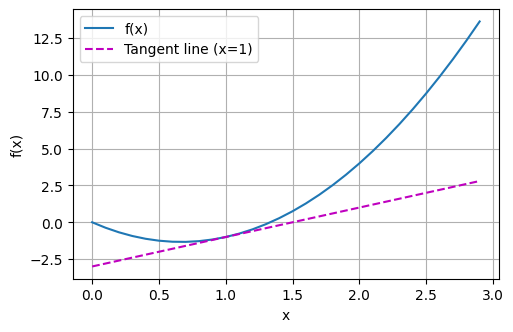

In [5]:
def f(x):
    return 3 * x ** 2 - 4 * x
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [9]:
import math
def normal(x, mul, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mul)**2)

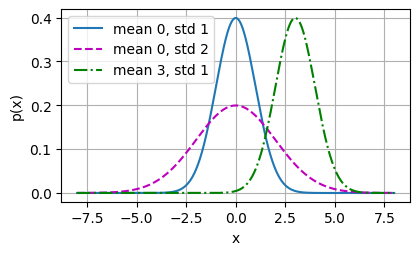

In [12]:
x = np.arange(-8.0, 8.0, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mul, sigma) for mul,sigma in params], xlabel='x', ylabel='p(x)', figsize=(4.5,2.5), legend=[f'mean {mu}, std {sigma}' for mu,sigma in params])